In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import ndimage
import pandas as pd

from keras import models, layers, metrics
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

import os

In [21]:
base_dir='../data/chest_xray/'

train_path = '../data/chest_xray/train'

validation_path = '../data/chest_xray/val'

test_path = '../data/chest_xray/test'

In [22]:
train_pneumonia=os.listdir('../data/chest_xray/train/PNEUMONIA/')
train_normal=os.listdir('../data/chest_xray/train/NORMAL/')
val_dir_normal=os.listdir('../data/chest_xray/val/NORMAL/')
test_dir_normal=os.listdir('../data/chest_xray/test/NORMAL/')
val_dir_pneumonia=os.listdir('../data/chest_xray/val/PNEUMONIA/')
test_dir_pneumonia=os.listdir('../data/chest_xray/test/PNEUMONIA/')

In [23]:
# Greyscale distribution histogram - done, Jamie
# Class distribution - heavily weighted towards positive class (pneumonia) - done, Jamie
# Address class imbalance - incorporate flipped 0-class images?
# Mean values for negative and positive classes
# Look for outliers
# Look at subracting the pixel mean
# Apply matrix transformations to further define images
# Rescaling and cropping?

In [24]:
print("Train set w/ pneumonia: ", len(train_pneumonia))
print("Train set normal: ", len(train_normal))
print("Validation set w/ pneumonia: ", len(val_dir_pneumonia))
print("Validation set normal: ", len(val_dir_normal))
print("Test set w/ pneumonia: ", len(test_dir_pneumonia))
print("Test set normal: ", len(test_dir_normal))

Train set w/ pneumonia:  3875
Train set normal:  1341
Validation set w/ pneumonia:  8
Validation set normal:  8
Test set w/ pneumonia:  390
Test set normal:  234


In [25]:
3875+1341, 390+234

(5216, 624)

In [26]:
train_labels_pos = [1 for img in train_pneumonia]
train_labels_neg = [0 for img in train_normal]
val_labels_pos = [1 for img in val_dir_pneumonia]
val_labels_neg = [0 for img in val_dir_normal]
test_labels_pos = [1 for img in test_dir_pneumonia]
test_labels_neg = [0 for img in test_dir_normal]

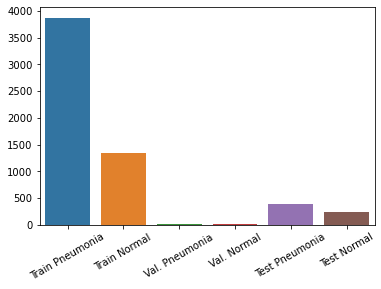

In [27]:
labels = ['Train Pneumonia', 'Train Normal', 'Val. Pneumonia', 'Val. Normal', 'Test Pneumonia', 'Test Normal']
dist = sns.barplot(x=labels, 
           y=[len(train_pneumonia), len(train_normal), len(val_dir_pneumonia), len(val_dir_normal), len(test_dir_pneumonia), len(test_dir_normal)],)

dist.set_xticklabels(labels = labels, rotation = 30);

In [28]:
# ^^ Huge class imbalance, especially in the training set

In [29]:
#loading images for training set - pneumonia

plt.suptitle("Patients with Pneumonia")
for i in range(0,4):
    img = train_pneumonia[i]
    img = load_img(train_path+'/PNEUMONIA/'+img)
#    plt.imshow(img)
#    plt.show()

<Figure size 432x288 with 0 Axes>

In [30]:
#loading images for training set - normal

plt.suptitle("Normal Patients")
for i in range(0,4):
    img = train_normal[i]
    img = load_img(train_path+'/NORMAL/'+img)
#    plt.imshow(img)
#    plt.show()

<Figure size 432x288 with 0 Axes>

In [35]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path, 
        target_size=(64, 64), batch_size= 5216)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_path, 
        target_size=(64, 64), batch_size = 16)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), batch_size = 624) 


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [36]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

In [37]:
print("train image shape: ", train_images.shape, "train labels shape: ", train_labels.shape)
print("validation image shape: ", val_images.shape, "validation labels shape: ", val_labels.shape)
print("test image shape: ", test_images.shape, "test labels shape: ", test_labels.shape)

train image shape:  (5216, 64, 64, 3) train labels shape:  (5216, 2)
validation image shape:  (16, 64, 64, 3) validation labels shape:  (16, 2)
test image shape:  (624, 64, 64, 3) test labels shape:  (624, 2)


In [38]:
train_images.shape[0]

5216

In [39]:
train_x = train_images.reshape(train_images.shape[0], -1)
val_x = val_images.reshape(val_images.shape[0], -1)
test_x = test_images.reshape(test_images.shape[0], -1)

In [40]:
train_x.shape, val_x.shape, test_x.shape

((5216, 12288), (16, 12288), (624, 12288))

In [43]:
train_y = np.reshape(train_labels[:,0], (5216,1))

val_y = np.reshape(val_labels[:,0], (16,1))

test_y = np.reshape(test_labels[:,0], (624,1))

In [76]:
#Initializing a first simple model with 1 hidden layer

np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(12, activation='relu', input_shape=(12288,)))
model.add(layers.Dense(32, activation = 'sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [80]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = metrics.Recall())

model.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(val_x, val_y))

Epoch 1/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0556 - recall_8: 0.9642 - val_loss: 0.8545 - val_recall_8: 0.6250
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0517 - recall_8: 0.9724 - val_loss: 1.1496 - val_recall_8: 1.0000
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0478 - recall_8: 0.9776 - val_loss: 1.2352 - val_recall_8: 0.5000
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0538 - recall_8: 0.9702 - val_loss: 0.0738 - val_recall_8: 0.8750
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0556 - recall_8: 0.9679 - val_loss: 0.8989 - val_recall_8: 0.6250
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0499 - recall_8: 0.9717 - val_loss: 0.5188 - val_recall_8: 0.6250
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0475 - recall_8: 0.9746 - val_loss: 0.6988 - val_recall_8: 0.6250
Epoch 

In [81]:
test_loss, test_recall = model.evaluate(test_x, test_y, verbose =2 )

20/20 - 0s - loss: 1.3972 - recall_8: 0.3162
